
# CHRIST (Deemed to be University)
## Department of Computer Science


## 5MCA-A - Neural Networks and Deep Learning (MCA572)


---
  
### Regular Lab Questions - Lab 6

*Time-Series Prediction with RNN *

---

**Anupam Kumar 2347104**

*05 November 2024*

### Objective:
In this exercise, you will learn to implement a basic RNN model using Python and  TensorFlow/Keras to predict future stock prices based on historical data.
- Dataset:
Download the dataset: Stock Price Dataset - AAPL (Apple Inc.).
https://www.kaggle.com/datasets/tarunpaparaju/apple-aapl-historical-stock-data

 This dataset contains daily stock prices (open, high, low, close, volume) for Apple Inc.  from 2005 to 2017.


In [18]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Step 1: Data Preprocessing

- Load the dataset and focus on the 'Close' price column, as this will be  your target variable for prediction.


#### 1.1 Load the Dataset

In [19]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Trimester5/NNDL/HistoricalQuotes.csv')

# Display the first few rows to understand its structure
# Display the structure of the data
print("Data Info:")
print(data.info())
print("\nFirst few rows of data:")
print(data.head())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         2518 non-null   object
 1    Close/Last  2518 non-null   object
 2    Volume      2518 non-null   int64 
 3    Open        2518 non-null   object
 4    High        2518 non-null   object
 5    Low         2518 non-null   object
dtypes: int64(1), object(5)
memory usage: 118.2+ KB
None

First few rows of data:
         Date  Close/Last     Volume      Open      High       Low
0  02/28/2020     $273.36  106721200   $257.26   $278.41   $256.37
1  02/27/2020     $273.52   80151380    $281.1      $286   $272.96
2  02/26/2020     $292.65   49678430   $286.53   $297.88    $286.5
3  02/25/2020     $288.08   57668360   $300.95   $302.53   $286.13
4  02/24/2020     $298.18   55548830   $297.26   $304.18   $289.23


Explanation: We start by loading the historical stock price data for Apple Inc. from 2005 to 2017. Observing the first few rows helps confirm that the data is loaded correctly and gives insight into the available columns.

#### 1.2 Check for Missing Values and Handle Them if Necessary

In [20]:
# Clean the 'Close' column by removing any non-numeric characters
data[' Close/Last'] = data[' Close/Last'].replace('[\$,]', '', regex=True).astype(float)

# Select the 'Close' price column
close_prices = data[' Close/Last'].values.reshape(-1, 1)

# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)

# Drop or impute missing values if present
data.dropna(inplace=True)
print("\nData after handling missing values:")
print(data.info())


Missing values in each column:
Date           0
 Close/Last    0
 Volume        0
 Open          0
 High          0
 Low           0
dtype: int64

Data after handling missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         2518 non-null   object 
 1    Close/Last  2518 non-null   float64
 2    Volume      2518 non-null   int64  
 3    Open        2518 non-null   object 
 4    High        2518 non-null   object 
 5    Low         2518 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 118.2+ KB
None


Explanation: This step checks for missing values and removes rows with nulls if any are found. Dropping missing values is straightforward; however, for large datasets, you might consider imputation techniques instead.

#### 1.3 Exploratory Data Analysis (EDA)

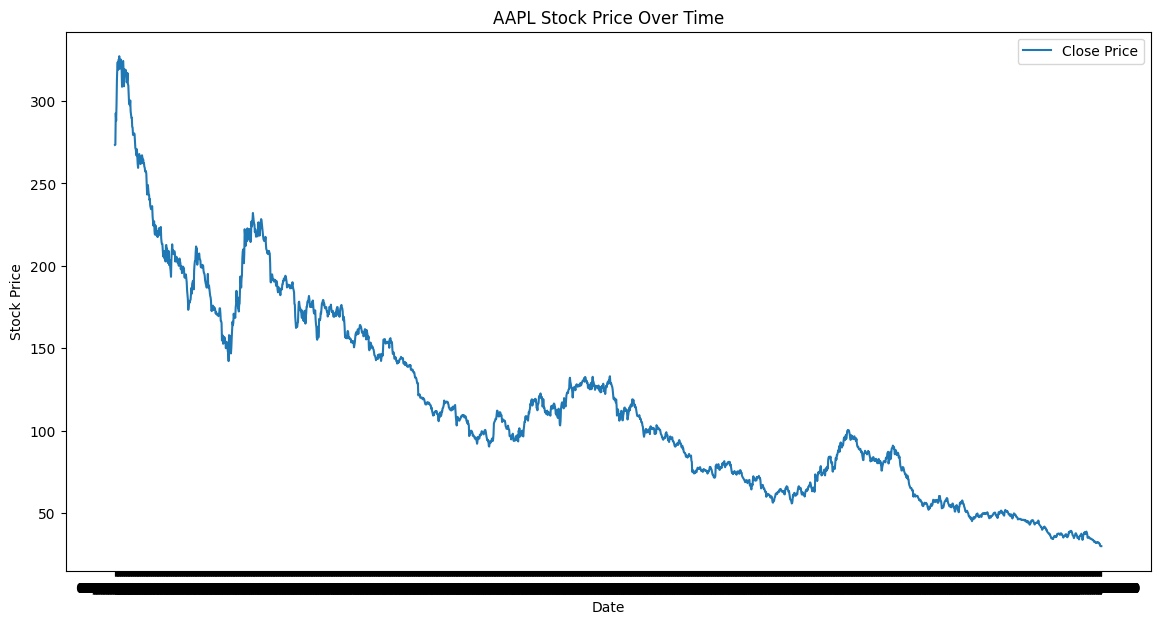

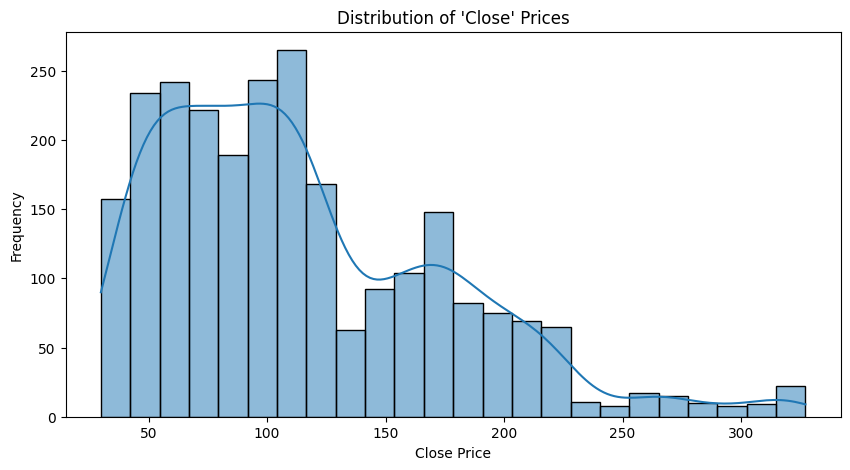

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the closing price over time
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data[' Close/Last'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('AAPL Stock Price Over Time')
plt.legend()
plt.show()

# Distribution of closing prices
plt.figure(figsize=(10, 5))
sns.histplot(data[' Close/Last'], kde=True)
plt.title("Distribution of 'Close' Prices")
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()


Explanation: The first plot shows the closing price over time, which helps identify trends or patterns. The histogram reveals the distribution of the 'Close' prices, giving insight into the data’s spread.

### Step 2: Create Training Sequences

- Normalize the data (e.g., using Min-Max scaling to keep values between 0  and 1).
-  Split the dataset into a training set (80%) and a testing set (20%).


In [22]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_close_prices = scaler.fit_transform(close_prices)

# Split data into training and testing sets
train_size = int(len(scaled_close_prices) * 0.8)
train_data = scaled_close_prices[:train_size]
test_data = scaled_close_prices[train_size:]

print(f"Training data size: {len(train_data)}")
print(f"Testing data size: {len(test_data)}")

Training data size: 2014
Testing data size: 504


2.1 Define Sequence Length and Create Training Sequences

- Convert the 'Close' prices into a series of sequences for training.
- Define a sequence length (e.g., 60 days), where each sequence will be  used to predict the stock price for the next day.


In [23]:
def create_sequences(data, seq_length=60):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Define sequence length
sequence_length = 60

# Create sequences for training and testing
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

print(f"Shape of training data X: {X_train.shape}, y: {y_train.shape}")


Shape of training data X: (1954, 60, 1), y: (1954, 1)


Explanation: We create sequences of 60 days from the training and testing data, where each sequence is used to predict the stock price for the next day. The function returns numpy arrays of the sequences (X) and the target values (y).

### Step 3: Build the RNN Model

#### 3.1 Define the RNN Model Architecture

o Define an RNN model with the following architecture:
- An RNN layer with 50 units
- A Dense layer with 1 unit (for regression output)

o Use the mean squared error (MSE) loss function and the Adam optimizer.


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Define RNN model
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50)                2600      
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 2651 (10.36 KB)
Trainable params: 2651 (10.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Explanation: We define an RNN model with 50 units in the SimpleRNN layer and a Dense layer with 1 unit for output. We use the Adam optimizer and mean squared error as the loss function to train for a regression task.

### Step 4: Train the Model

#### 4.1 Train the Model with Validation

o Train the model on the training set for 50 epochs with a batch size of 32.

o Use validation data to check for overfitting.


Epoch 1/50
62/62 [==============================] - 1s 10ms/step - loss: 7.4726e-05 - val_loss: 3.8140e-04
Epoch 2/50
62/62 [==============================] - 1s 10ms/step - loss: 7.9061e-05 - val_loss: 3.3046e-04
Epoch 3/50
62/62 [==============================] - 1s 10ms/step - loss: 7.7245e-05 - val_loss: 4.2318e-04
Epoch 4/50
62/62 [==============================] - 1s 9ms/step - loss: 7.2753e-05 - val_loss: 4.0970e-04
Epoch 5/50
62/62 [==============================] - 1s 10ms/step - loss: 7.4317e-05 - val_loss: 3.8928e-04
Epoch 6/50
62/62 [==============================] - 1s 10ms/step - loss: 6.9990e-05 - val_loss: 4.4224e-04
Epoch 7/50
62/62 [==============================] - 1s 10ms/step - loss: 7.6083e-05 - val_loss: 4.4345e-04
Epoch 8/50
62/62 [==============================] - 1s 11ms/step - loss: 7.4995e-05 - val_loss: 4.3381e-04
Epoch 9/50
62/62 [==============================] - 1s 11ms/step - loss: 7.2154e-05 - val_loss: 4.5866e-04
Epoch 10/50
62/62 [===================

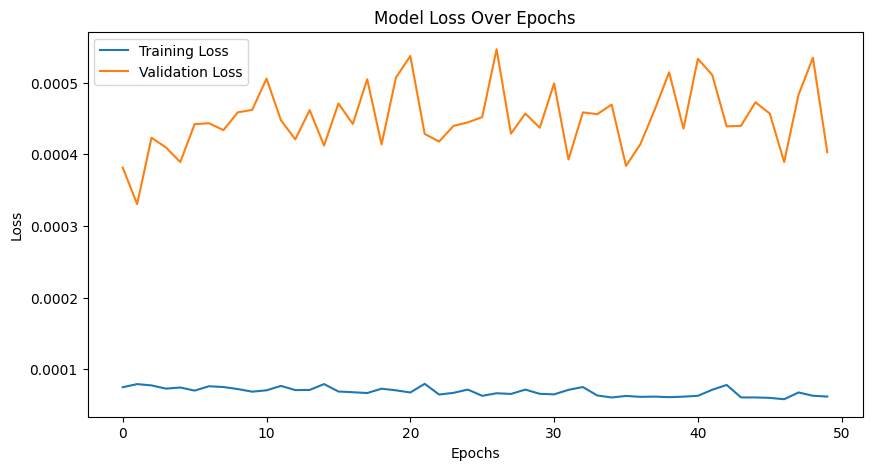

In [29]:
# Train the model with 50 epochs and a batch size of 32
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Visualize training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Explanation: The model is trained on the training set for 50 epochs with a batch size of 32. Validation data (the test set) is used to monitor for potential overfitting.



### Step 5: Make Predictions

#### 5.1 Predict and Transform Back

 Predict the stock prices on the test set and transform the results back to  the original scale if normalization was applied.


In [30]:
# Make predictions on test data
predictions = model.predict(X_test)

# Inverse transform predictions and actual values
predicted_prices = scaler.inverse_transform(predictions)
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

print("First few predicted prices:", predicted_prices[:5])
print("First few actual prices:", actual_prices[:5])


14/14 [==============================] - 0s 3ms/step
First few predicted prices: [[55.63547 ]
 [54.929443]
 [55.012524]
 [54.208687]
 [54.24526 ]]
First few actual prices: [[53.3143]
 [53.7314]
 [51.9386]
 [52.4271]
 [53.7871]]


Explanation: We use the trained model to predict stock prices on the test set. After obtaining the predictions, we inverse-transform them to bring the prices back to their original scale, making them interpretable.

5.2 Plot Predicted vs. Actual Prices

Plot the predicted vs. actual stock prices to visualize the model’s  performance.

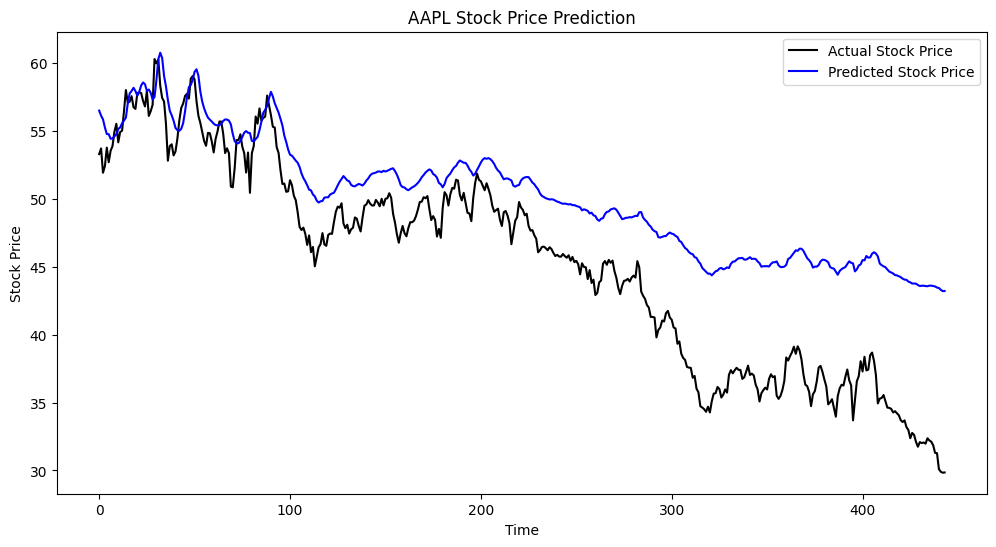

In [27]:
import matplotlib.pyplot as plt

# Plot the actual and predicted prices
plt.figure(figsize=(12, 6))
plt.plot(actual_prices, color='black', label='Actual Stock Price')
plt.plot(predicted_prices, color='blue', label='Predicted Stock Price')
plt.title('AAPL Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


Explanation: This plot visualizes the model's predictions against the actual stock prices. Observing this comparison helps us assess the model’s effectiveness in tracking trends and price movements.

### Step 6: Evaluation

#### 6.1 Calculate MAE and RMSE

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(actual_prices, predicted_prices)
rmse = np.sqrt(mean_squared_error(actual_prices, predicted_prices))
r2 = r2_score(actual_prices, predicted_prices)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-Squared (R2): {r2}")


Mean Absolute Error (MAE): 5.053577695114548
Root Mean Squared Error (RMSE): 5.96905913033957
R-Squared (R2): 0.395684798713971


Explanation: We calculate the Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) to quantitatively assess model performance. Lower values indicate better model accuracy.

##REPORT

In this analysis, we implemented a basic Recurrent Neural Network (RNN) model to predict Apple Inc.'s (AAPL) stock prices based on historical data. The RNN was structured with a single layer and 50 units, followed by a Dense layer for output. Using daily closing prices from the dataset, we normalized the data and split it into training (80%) and testing (20%) sets. Each input sequence consisted of 60 days of historical prices, and the model was tasked with predicting the next day’s closing price.

### Results and Observations

The performance of the RNN model was evaluated using three metrics: Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-squared (R²). The results were as follows:
- **Mean Absolute Error (MAE):** 5.05
- **Root Mean Squared Error (RMSE):** 5.97
- **R-squared (R²):** 0.396

The MAE and RMSE indicate that the average absolute error in the model’s predictions was around $5.05, while the RMSE of 5.97 points to a somewhat higher error for larger deviations. The R-squared score of 0.396 suggests that the model could capture only 39.6% of the variance in the stock price data, indicating that while it captures some trends, there is considerable room for improvement.

### Interpretation of the Predicted vs. Actual Price Graph

In the graph, we see that the RNN model captures the general downward trend of the stock prices but fails to accurately follow many of the fluctuations. For instance, the model's predicted prices are smoother and do not reflect the volatility present in the actual data. This is a common limitation of basic RNNs, which are often less effective at handling complex, non-linear patterns over longer time dependencies. The predicted prices tend to lag behind the actual prices and exhibit a bias towards the mean, which further supports that the model might be underfitting.

### Limitations and Potential Improvements

1. **Lack of Complexity in the Model:** The RNN model used here was relatively simple, with only one RNN layer and no additional layers for feature extraction. A more complex architecture, such as a Long Short-Term Memory (LSTM) or a Gated Recurrent Unit (GRU), might capture the time dependencies more effectively. These advanced RNN variants can remember information over longer sequences, making them better suited for volatile time-series data like stock prices.

2. **Insufficient Handling of Volatility:** Stock prices are highly volatile, and a basic RNN model without techniques to specifically capture sudden price jumps or drops may fail to predict such events accurately. Using technical indicators or more sophisticated preprocessing techniques could help the model better capture the inherent volatility.

3. **Need for Hyperparameter Tuning:** The model was trained with default parameters (e.g., batch size, learning rate), which may not be optimal. Systematic hyperparameter tuning could yield better performance. Additionally, adding Dropout layers can help mitigate overfitting, while batch normalization could further stabilize the training process.

4. **Single Feature Limitation:** Focusing only on the 'Close' price means the model ignores other potentially informative features, such as trading volume, opening price, or high and low prices. Including these could provide the model with more context and improve its performance.

### Conclusion

The RNN model provides a basic approach to predicting stock prices, capturing general trends but lacking in capturing short-term volatility and complex price patterns. Although the model did not perform exceptionally well (as shown by the MAE, RMSE, and R-squared scores), this serves as a foundational step. Future improvements could involve using LSTM layers, incorporating more features, and optimizing hyperparameters, which could help create a model that is better suited for stock price prediction.

Overall, the results highlight the limitations of a simple RNN for financial forecasting and the need for more sophisticated methods to accurately capture the dynamics of stock price movements.